Here is the Kaggle link to the dataset I have used:

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

Loan Prediction Problem Dataset

#### 1. Problem Definition

The loan prediction problem consists of building a supervised machine learning model that predicts whether a loan application should be **approved or rejected** based on an applicant's demographic, financial, and loan-related attributes.
Formally, it is a **binary classification problem**, where the target variable indicates loan approval status (Loan_Status: Yes/No).

#### 2. Motivation (African Context)

In many African countries, financial institutions face challenges such as:

- Limited access to credit for individuals and small businesses

- High default risk due to informal income sources

- Manual and subjective loan approval processes

An automated loan prediction system helps:

- Improve financial inclusion by enabling fairer credit decisions

- Reduce human bias and operational costs

- Support microfinance institutions and banks in making data-driven lending decisions, especially in underbanked populations

Such models are particularly valuable in African contexts where credit history data may be scarce and alternative features must be leveraged effectively.


#### 3. Dataset Description

The dataset contains information about loan applicants and their loan approval outcomes. It includes **demographic, financial, and loan-specific features.**

Key characteristics:

- **Source:** Kaggle – Loan Prediction Problem Dataset

- **Target variable:** Loan_Status (Approved / Not Approved)

- **Feature types:**

    - Demographic: Gender, Marital Status, Education, Dependents

    - Financial: ApplicantIncome, CoapplicantIncome, Credit_History

    - Loan-related: LoanAmount, Loan_Amount_Term, Property_Area

The dataset includes both **categorical and numerical variables**, requiring preprocessing steps such as encoding and missing value handling.

#### 4. Proposed Method

The proposed approach follows a standard machine learning pipeline:

1. **Data preprocessing**

    - Handling missing values

    - Encoding categorical variables

    - Feature scaling (if required)

2. **Exploratory Data Analysis (EDA)**

    - Understanding feature distributions

    - Identifying relationships between features and loan approval

3. **Model training**

    - Applying classification algorithms such as Logistic Regression, Decision Trees, or Random Forests

    - Training on historical loan data

4. **Model evaluation**

    - Using metrics such as accuracy, precision, recall, and confusion matrix

5. **Fairness Analysis and Tests**

    - Analyzing model predictions across sensitive attributes such as gender and marital status and by identifying potential biases in approval outcomes 

The final model is used to predict loan approval outcomes for new applicants based on learned patterns in the data.

In [935]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import pickle

In [936]:
# Read the dataset
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [937]:
# Displaying all rows in the dataset
pd.set_option('display.max_rows', df.shape[0] + 1)
# df

In [938]:
# Displaying the first 5 lines and last 5 lines of the dataset
pd.set_option('display.max_rows', 10)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [939]:
# Displaying the shape of the dataset
df.shape

(614, 13)

In [940]:
# View missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [941]:
# Display columns containing null values in descending order
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [942]:
# Displaying the dataset columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [943]:
# Displaying categorical variables and numerical variables
var_cat = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

print('The categorical variables are:', var_cat)
print('The numerical variables are:', var_num)

The categorical variables are: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
The numerical variables are: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [944]:
# Displaying statistical summary of numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [945]:
# Displaying statistical summary of categorical variables
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [946]:
# Enter the values in cat_data and num_data dataframes
cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
  if c == object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
    
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [947]:
# Displaying the dataframe of categorical variables
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [948]:
# Displaying the dataframe of numerical variables
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [949]:
# For categorical variables, we will replace missing values with the most frequently occurring values
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

np.False_

In [950]:
# For numerical variables, we will replace missing values with the previous value in the same column.
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

np.False_

In [951]:
# Transform the target column
target_value = {'Y': 1, 'N': 0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [952]:
# Replace categorical values with numerical values 0, 1, 2...
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [953]:
# Remove loan_id column
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [954]:
# Concatenate cat_data and num_data and specify the target column
X = pd.concat([cat_data,num_data], axis=1)
y = target
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Exploratory Data Analysis

In [955]:
# Let's start with the target variable
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [956]:
# Percentage of the different target values
target.value_counts(normalize=True) * 100

Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit granted or not'}, xlabel='Loan_Status'>

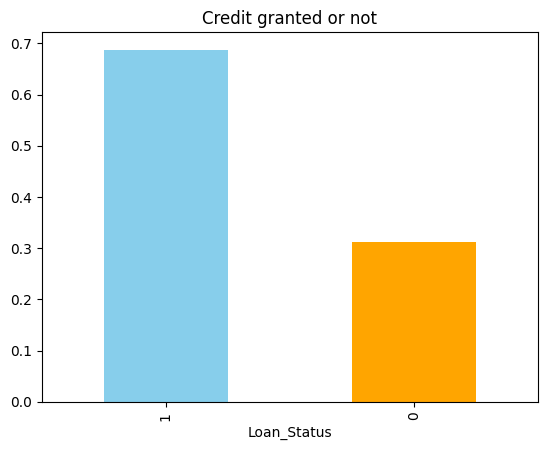

In [957]:
target.value_counts(normalize=True).plot.bar(title='Credit granted or not', color=['skyblue', 'orange'])

In [958]:
# The database used for EDA
df = pd.concat([cat_data, num_data, target], axis=1)

#### EDA for categorical variables

In [959]:
df['Gender'].value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

In [960]:
df['Gender'].value_counts(normalize=True) * 100

Gender
1    81.758958
0    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'Comparison of the Genders'}, xlabel='Gender'>

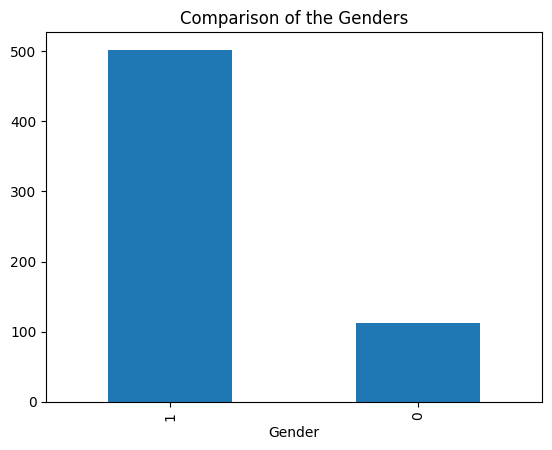

In [961]:
df['Gender'].value_counts().plot.bar(title='Comparison of the Genders')

In [962]:
# Dependents
df['Dependents'].value_counts(normalize=True)*100

Dependents
0    58.631922
1    16.612378
2    16.449511
3     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'Number of children'}, xlabel='Dependents'>

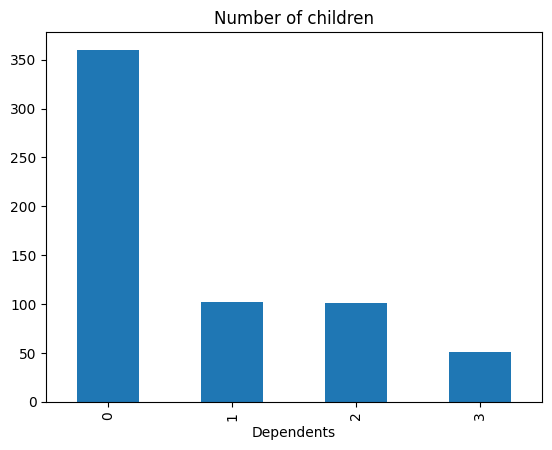

In [963]:
df['Dependents'].value_counts().plot.bar(title='Number of children')

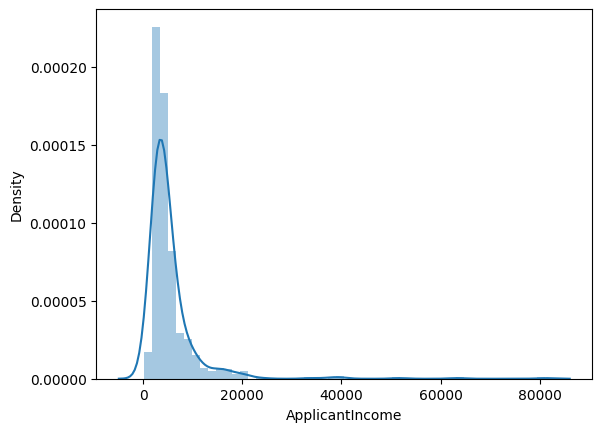

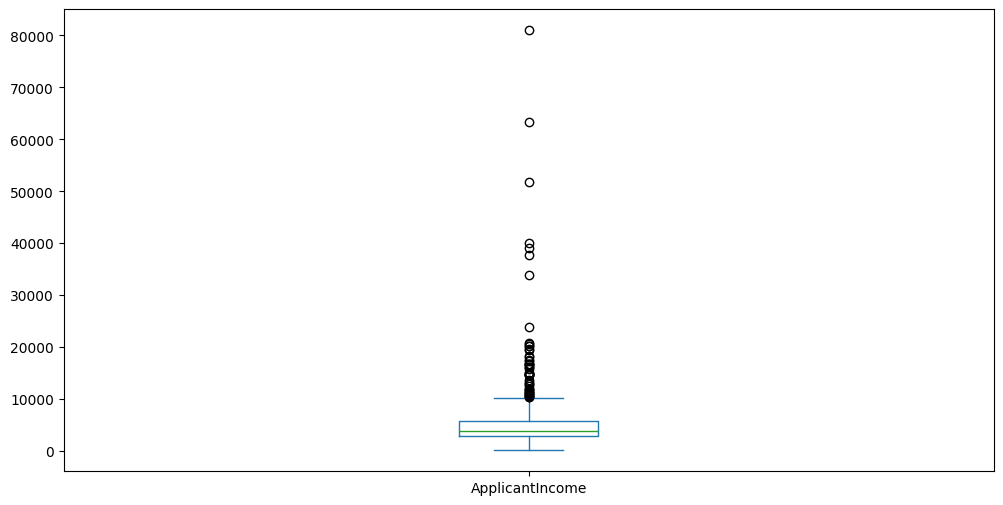

In [964]:
# ApplicantIncome
plt.figure()
sns.distplot(df['ApplicantIncome'])
plt.show()

plt.figure()
df['ApplicantIncome'].plot.box(figsize=(12,6))
plt.show()

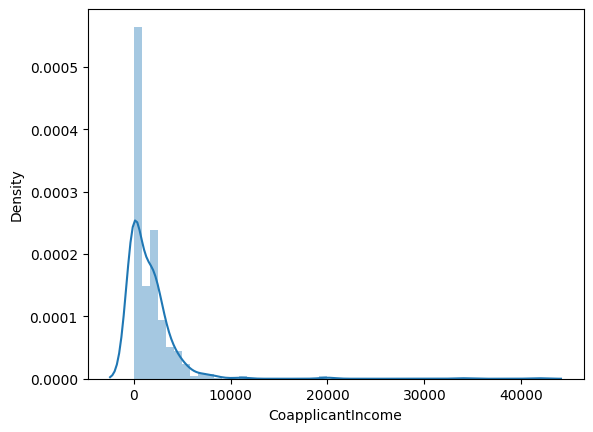

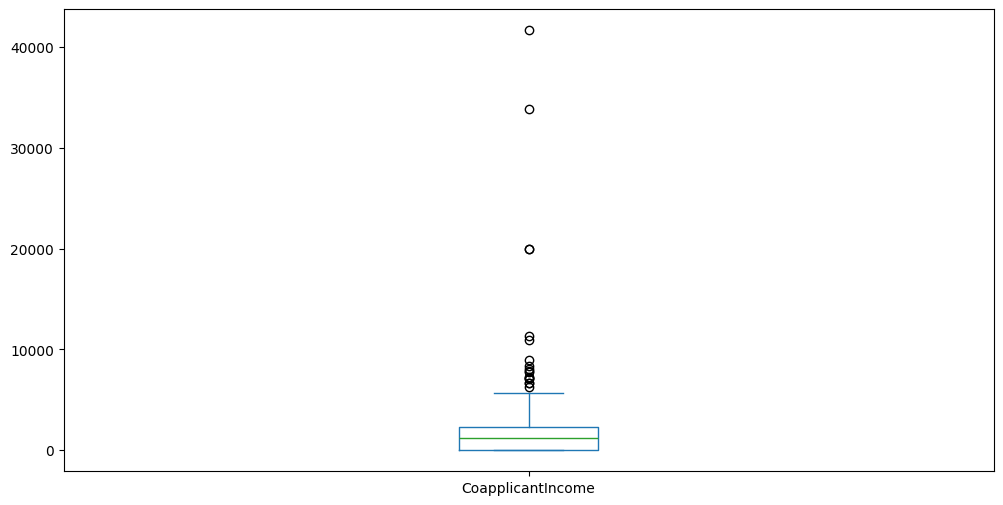

In [965]:
# CoapplicantIncome
plt.figure()
sns.distplot(df['CoapplicantIncome'])
plt.show()

plt.figure()
df['CoapplicantIncome'].plot.box(figsize=(12,6))
plt.show()

#### Bivariate Analysis

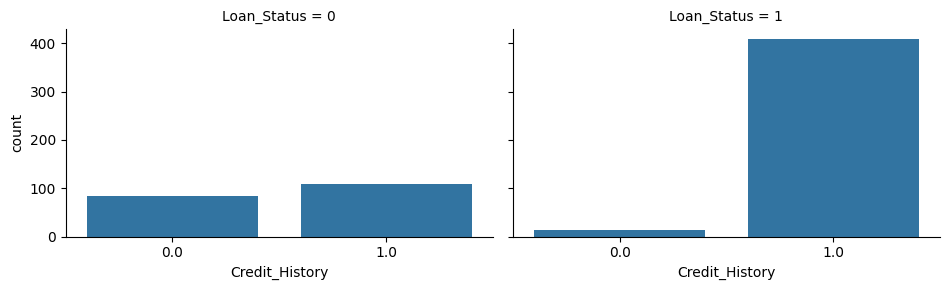

In [966]:
# Credit history 
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

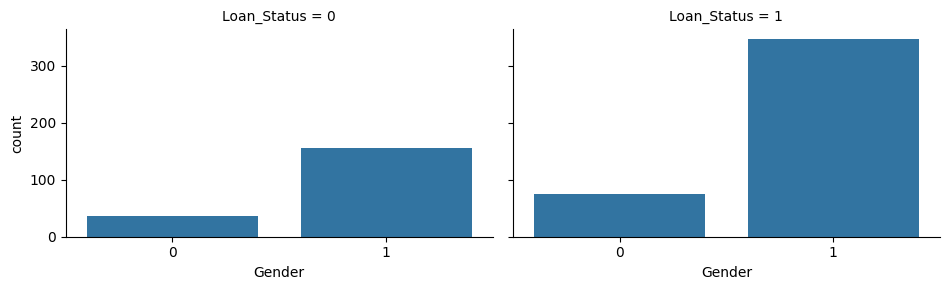

In [967]:
# Gender
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Gender')

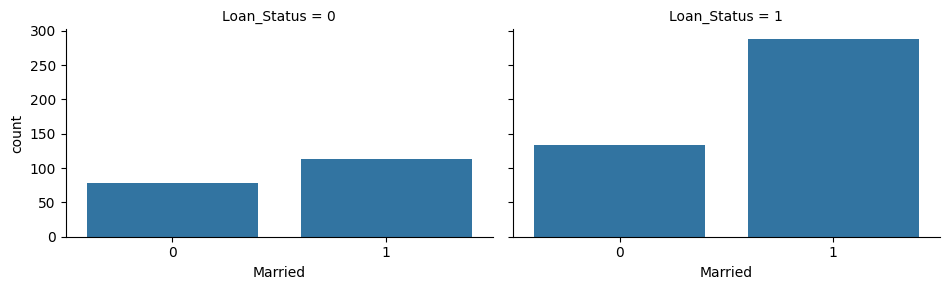

In [968]:
# Married
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Married')

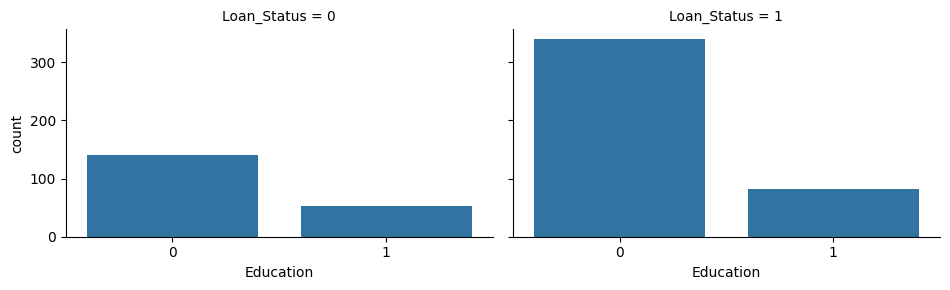

In [969]:
# Education
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Education')

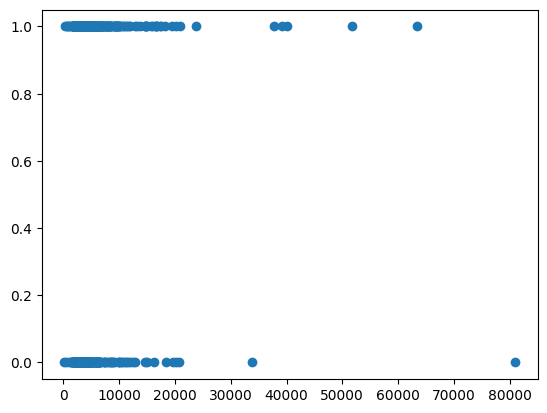

In [970]:
# ApplicantIncome vs Loan_Status
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])

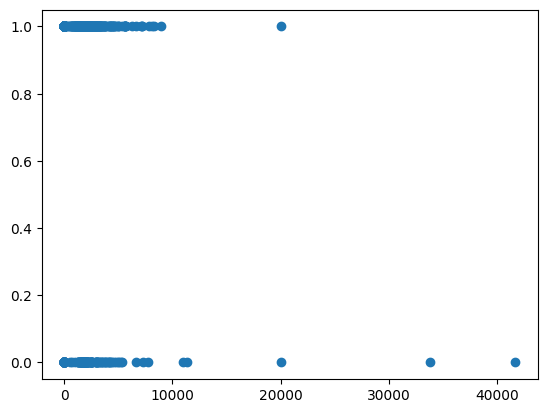

In [971]:
# CoapplicantIncome vs Loan_Status
plt.scatter(df['CoapplicantIncome'], df['Loan_Status'])

In [972]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


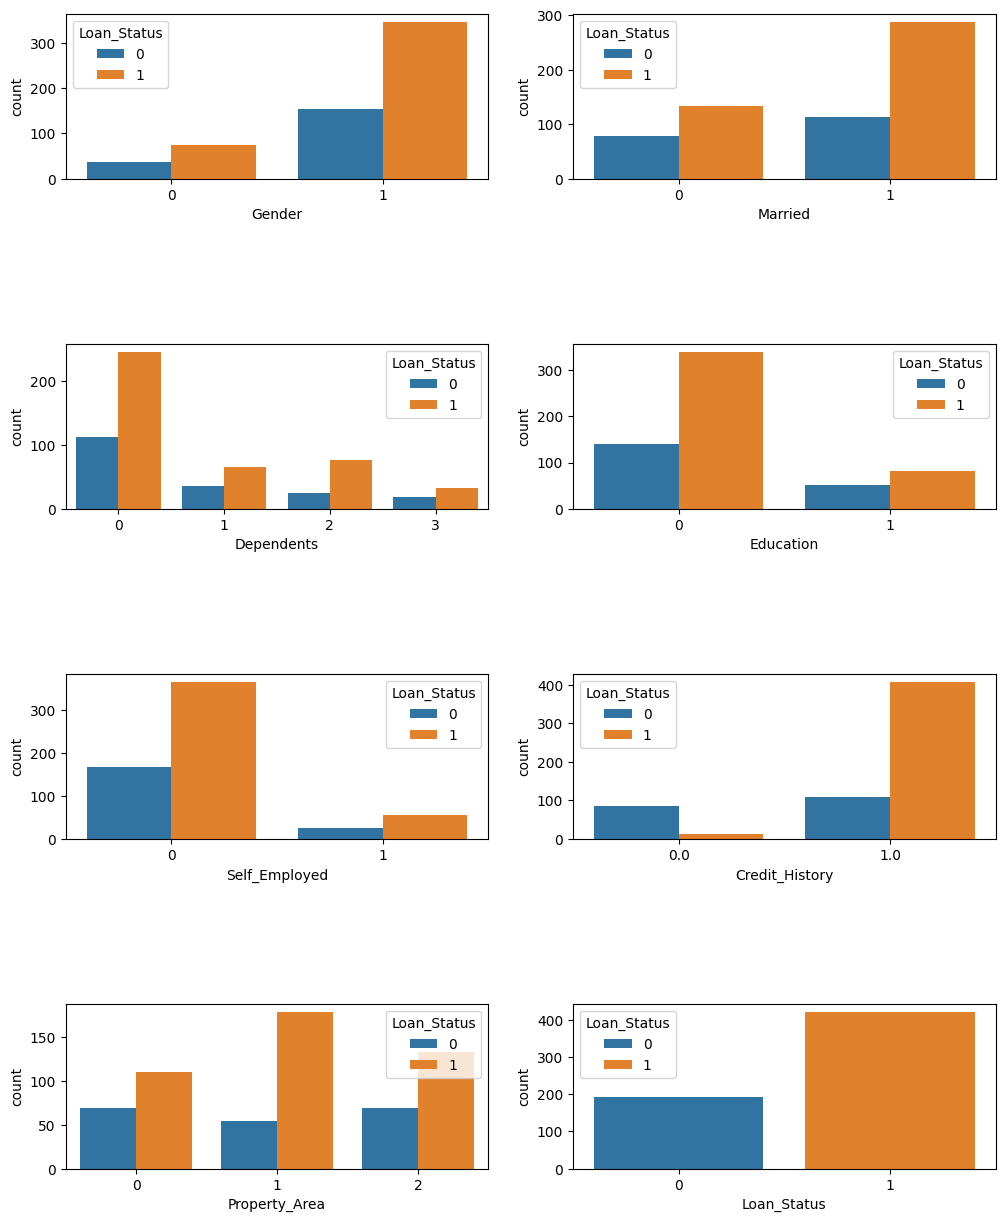

In [973]:
# Categorical variables
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

<Axes: >

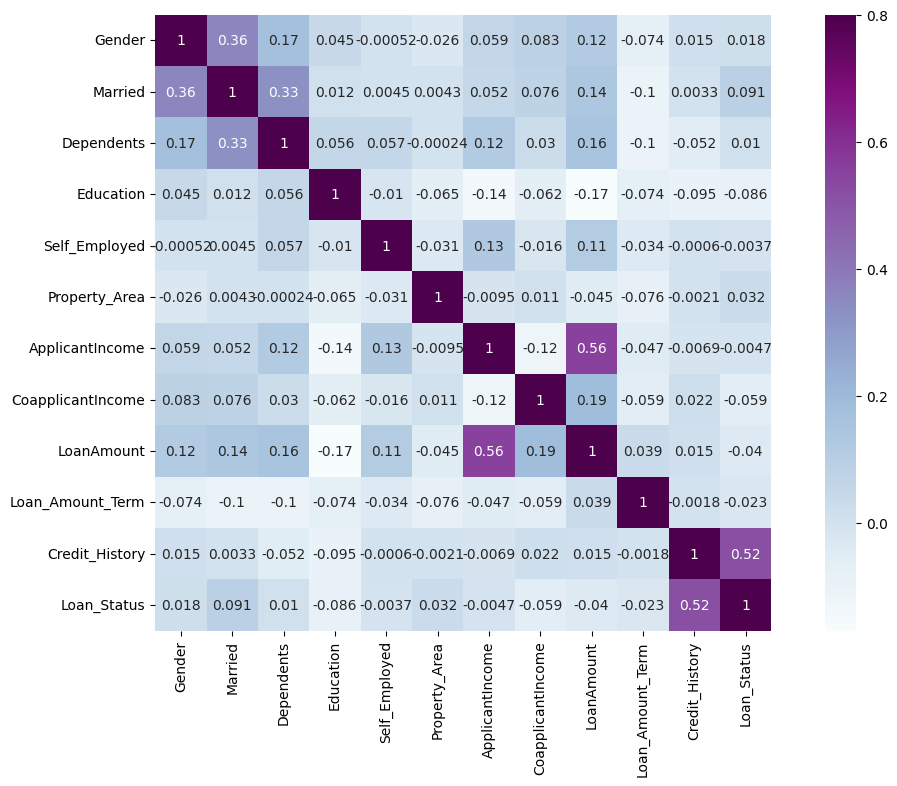

In [974]:
# Correlation of numerical variables
matrix = df.select_dtypes(include=['float64', 'int64']).corr()
f,ax=plt.subplots(figsize=(14,8))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot=True)

### Model creation

In [975]:
# Divide the database into a test set and a training set
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(X,y):
  X_train, X_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train size: ', X_train.shape)
print('X_test size: ', X_test.shape)
print('y_train size: ', y_train.shape)
print('y_test size: ', y_test.shape)

X_train size:  (491, 11)
X_test size:  (123, 11)
y_train size:  (491,)
y_test size:  (123,)


In [976]:
# We will apply three algorithms: Logistic Regression, KNN, and Decision Tree
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# The precision function
def accu(y_true, y_pred, retu=False):
  acc = accuracy_score(y_true, y_pred)
  if retu:
    return acc
  else:
    print(f'The accuracy of the model is: {acc}')

# Model application function
def train_test_eval(models, X_train, y_train, X_test, y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train, y_train)
    accu(y_test, model.predict(X_test))
    print('-'*30)

train_test_eval(models, X_train, y_train, X_test, y_test)


LogisticRegression :
The accuracy of the model is: 0.8536585365853658
------------------------------
KNeighborsClassifier :
The accuracy of the model is: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
The accuracy of the model is: 0.8455284552845529
------------------------------


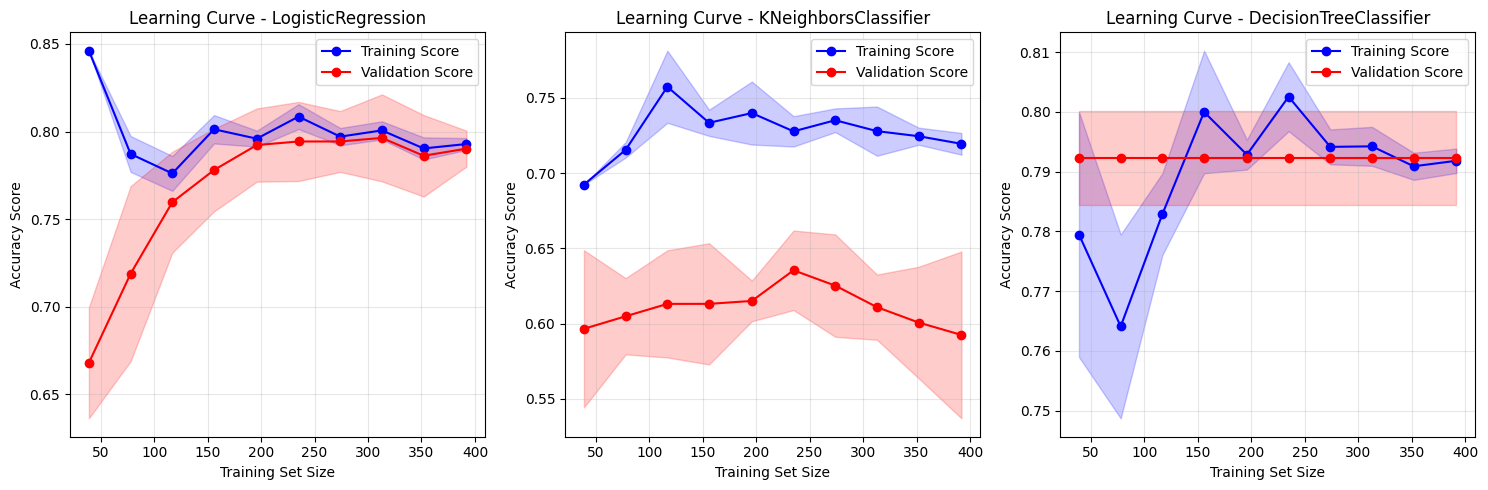

In [977]:
# Learning Curves for all 3 models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

model_names = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier']
model_list = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=1, random_state=42)
]

for idx, (name, model) in enumerate(zip(model_names, model_list)):
    # Calculate learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    # Calculate means and standard deviations
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Plotting curves
    axes[idx].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    axes[idx].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    axes[idx].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    axes[idx].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')
    
    axes[idx].set_xlabel('Training Set Size')
    axes[idx].set_ylabel('Accuracy Score')
    axes[idx].set_title(f'Learning Curve - {name}')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

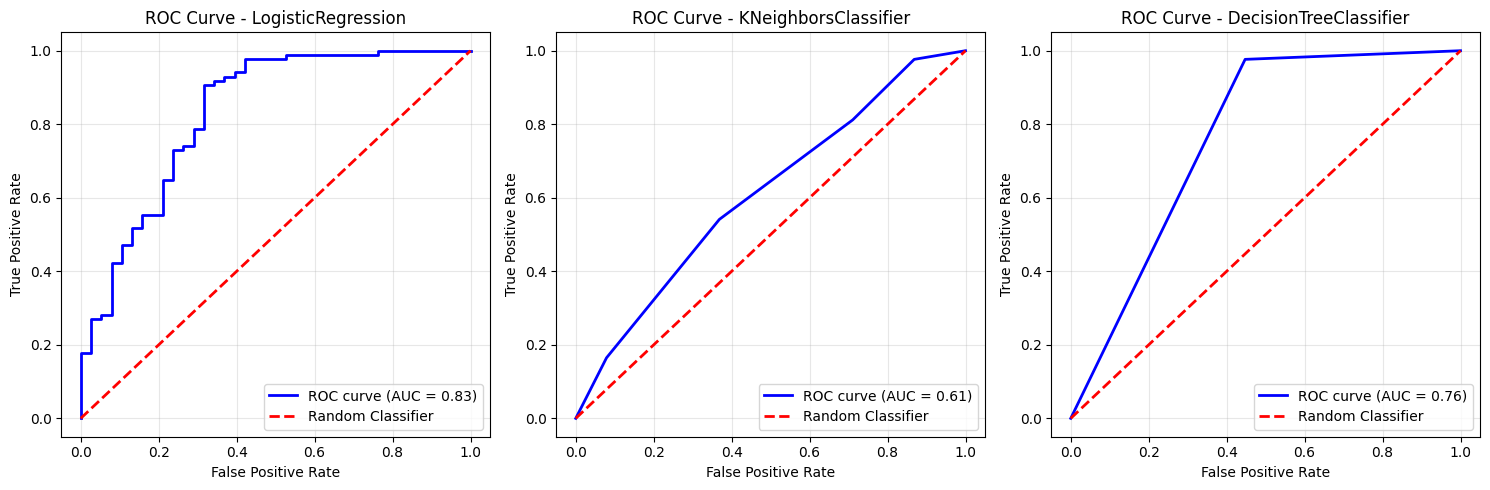

In [997]:
# ROC curves for the 3 models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, model) in enumerate(zip(model_names, model_list)):
    # Train the model
    model.fit(X_train, y_train)
    
    # Obtain the probabilities for the positive class
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    axes[idx].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[idx].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve - {name}')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interprétation du modèle avec SHAP et LIME

In [ ]:
# Install the required packages if not already installed
import subprocess
import sys

try:
    import shap
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "shap", "-q"])
    import shap

try:
    import lime
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lime", "-q"])
    import lime

import lime.lime_tabular
import warnings
warnings.filterwarnings('ignore')


In [999]:
# Train the final Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Check accuracy
y_pred = lr_model.predict(X_test)
print(f'Accuracy of the Logistic Regression model: {accuracy_score(y_test, y_pred):.4f}')


Accuracy of the Logistic Regression model: 0.8537


#### 1. Logistic Regression Model Coefficients

In [1000]:
# Display the model coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Logistic Regression Model Coefficients:")
print(coefficients_df.to_string())


Logistic Regression Model Coefficients:
              Feature  Coefficient  Abs_Coefficient
10     Credit_History     2.576690         2.576690
1             Married     0.433714         0.433714
0              Gender    -0.407803         0.407803
3           Education    -0.386629         0.386629
4       Self_Employed    -0.239769         0.239769
2          Dependents     0.145129         0.145129
5       Property_Area     0.064984         0.064984
9    Loan_Amount_Term    -0.001818         0.001818
8          LoanAmount    -0.000720         0.000720
7   CoapplicantIncome    -0.000064         0.000064
6     ApplicantIncome    -0.000007         0.000007


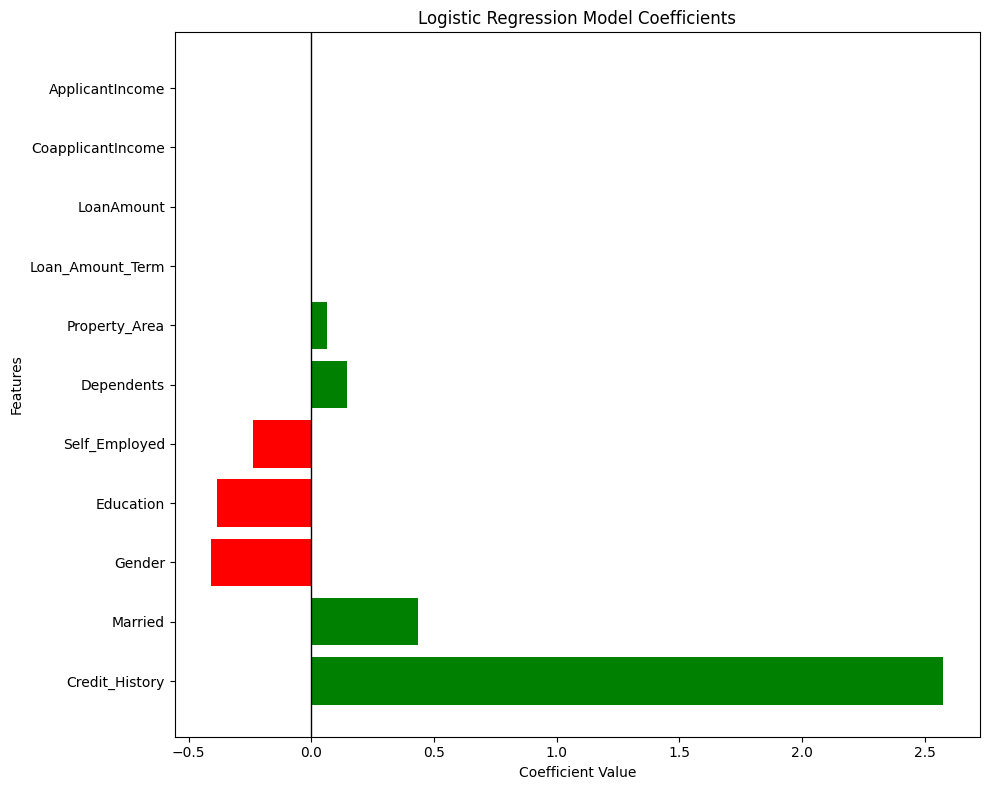

In [1001]:
# Visualise coefficients
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in coefficients_df['Coefficient']]
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Model Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()


#### 2. Interpreting with LIME

In [1002]:
# Create the LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['Not Granted', 'Granted'],
    mode='classification',
    random_state=42,
    verbose=False
)

print("Explainer LIME successfully created")


Explainer LIME successfully created


In [1003]:
# Function for explaining an instance with LIME
def explain_instance_lime(idx, num_features=10):
    exp = explainer_lime.explain_instance(
        data_row=X_test.iloc[idx].values,
        predict_fn=lr_model.predict_proba,
        num_features=num_features
    )
    
    prediction = lr_model.predict(X_test.iloc[[idx]])[0]
    probability = lr_model.predict_proba(X_test.iloc[[idx]])[0]
    
    print(f"\n{'='*70}")
    print(f"LIME explanation - Instance {idx}")
    print(f"{'='*70}")
    print(f"Prediction: {'Granted' if prediction == 1 else 'Not Granted'}")
    print(f"Probability (Not Granted | Granted): {probability[0]:.2%} | {probability[1]:.2%}")
    print(f"\nFactors influencing the decision:")
    print("-" * 70)
    
    for feature, weight in exp.as_list():
        direction = "↑ Promotes Granted" if weight > 0 else "↓ Promotes Refusal"
        print(f"{feature:45s} {weight:+.4f}  {direction}")
    
    return exp

# Explain instance 0
exp_0 = explain_instance_lime(0, num_features=10)



LIME explanation - Instance 0
Prediction: Not Granted
Probability (Not Granted | Granted): 83.76% | 16.24%

Factors influencing the decision:
----------------------------------------------------------------------
Married <= 0.00                               -0.0985  ↓ Promotes Refusal
Education <= 0.00                             +0.0878  ↑ Promotes Granted
Loan_Amount_Term <= 360.00                    +0.0826  ↑ Promotes Granted
CoapplicantIncome <= 0.00                     +0.0544  ↑ Promotes Granted
Dependents <= 0.00                            -0.0510  ↓ Promotes Refusal
Self_Employed <= 0.00                         +0.0433  ↑ Promotes Granted
Property_Area <= 0.00                         -0.0207  ↓ Promotes Refusal
ApplicantIncome > 5825.00                     -0.0149  ↓ Promotes Refusal
100.00 < LoanAmount <= 128.00                 +0.0118  ↑ Promotes Granted
Credit_History <= 1.00                        +0.0000  ↓ Promotes Refusal


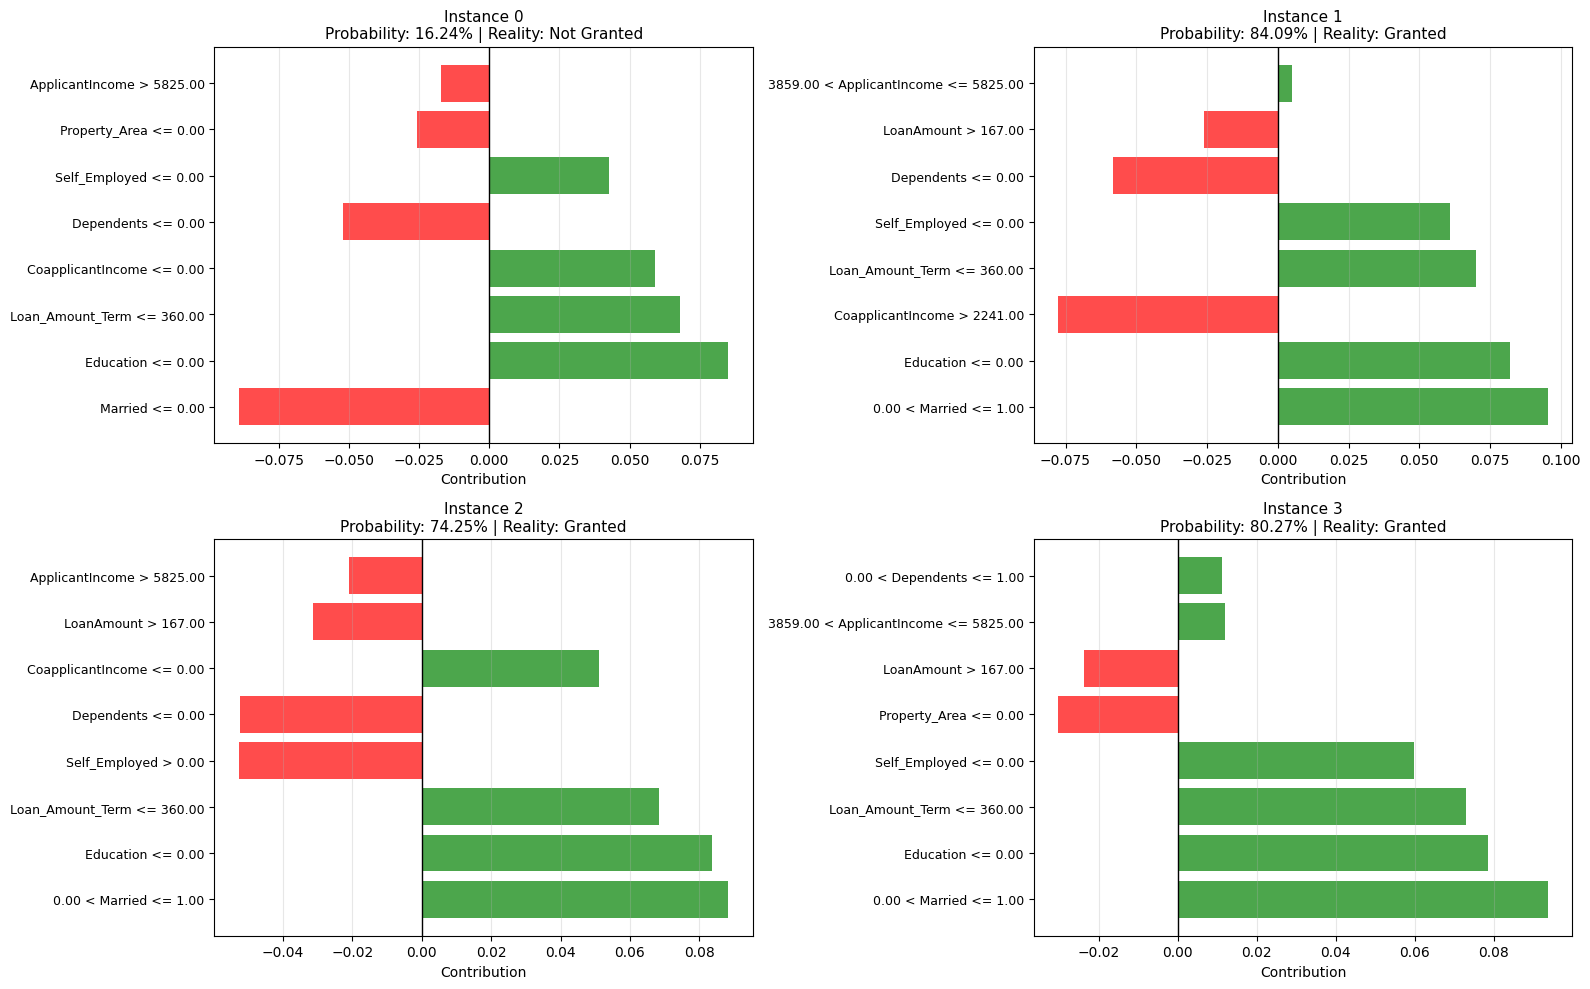

In [1004]:
# Explain multiple instances with visualisation
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx in range(4):
    exp = explainer_lime.explain_instance(
        data_row=X_test.iloc[idx].values,
        predict_fn=lr_model.predict_proba,
        num_features=8
    )
    
    exp_list = exp.as_list()
    features = [item[0] for item in exp_list]
    weights = [item[1] for item in exp_list]
    
    colors = ['green' if w > 0 else 'red' for w in weights]
    axes[idx].barh(range(len(features)), weights, color=colors, alpha=0.7)
    axes[idx].set_yticks(range(len(features)))
    axes[idx].set_yticklabels(features, fontsize=9)
    axes[idx].set_xlabel('Contribution', fontsize=10)
    
    prediction = lr_model.predict_proba(X_test.iloc[[idx]])[0]
    prob_accorded = prediction[1]
    actual = 'Granted' if y_test.iloc[idx] == 1 else 'Not Granted'
    
    axes[idx].set_title(f'Instance {idx}\nProbability: {prob_accorded:.2%} | Reality: {actual}', fontsize=11)
    axes[idx].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


#### 3. Interpretation with SHAP (simplified)

Simplified SHAP analysis based on model coefficients:


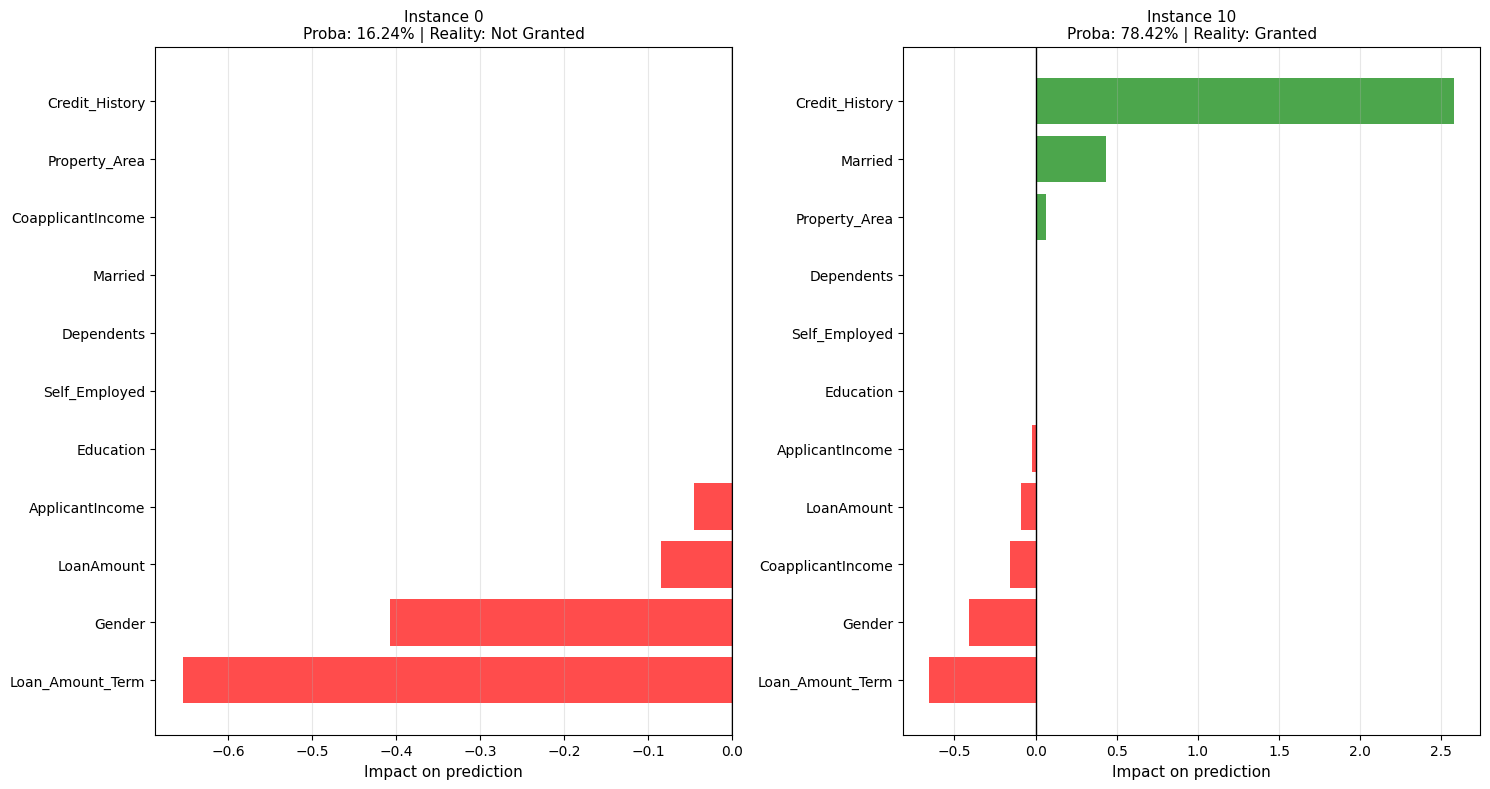

In [1005]:
# Simplified version of SHAP (without KernelExplainer, which is slow)
# Direct use of coefficients and feature impact

print("Simplified SHAP analysis based on model coefficients:")
print("="*70)

# Calculate the impact of each feature for a few instances
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

for plot_idx, instance_idx in enumerate([0, 10]):
    instance = X_test.iloc[instance_idx]
    
    # Calculate the contribution of each feature
    contributions = instance.values * lr_model.coef_[0]
    
    df_contrib = pd.DataFrame({
        'Feature': X.columns,
        'Value': instance.values,
        'Coefficient': lr_model.coef_[0],
        'Contribution': contributions
    }).sort_values('Contribution', ascending=True)
    
    colors = ['green' if x > 0 else 'red' for x in df_contrib['Contribution']]
    axes[plot_idx].barh(df_contrib['Feature'], df_contrib['Contribution'], color=colors, alpha=0.7)
    axes[plot_idx].set_xlabel('Impact on prediction', fontsize=11)
    
    prob = lr_model.predict_proba(X_test.iloc[[instance_idx]])[0]
    actual = 'Granted' if y_test.iloc[instance_idx] == 1 else 'Not Granted'
    
    axes[plot_idx].set_title(f'Instance {instance_idx}\nProba: {prob[1]:.2%} | Reality: {actual}', fontsize=11)
    axes[plot_idx].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[plot_idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Model Fairness and Bias Analysis

In [1006]:
# Install the necessary packages if not already installed
import subprocess
import sys

try:
    from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "fairlearn", "-q"])
    from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference

try:
    from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
except ImportError:
    pass


#### 1. Analysis by demographic group (Gender)

In [1007]:
# Prepare test data with demographic groups
X_test_with_gender = X_test.copy()
X_test_with_gender['Gender'] = cat_data.loc[X_test.index, 'Gender']

# Get predictions
y_pred_test = lr_model.predict(X_test)
y_pred_proba_test = lr_model.predict_proba(X_test)[:, 1]

print("="*70)
print("FAIRNESS ANALYSIS - By Gender (Gender)")
print("="*70)

# Selection rates by gender
print("\n1. SELECTION RATE BY GROUP:")
print("-" * 70)

for gender_value, gender_name in [(0, 'Woman'), (1, 'Man')]:
    mask = X_test_with_gender['Gender'] == gender_value
    if mask.sum() > 0:
        selection = y_pred_test[mask].mean()
        count = mask.sum()
        print(f"{gender_name:20s}: {selection:.2%} ({count} instances)")


FAIRNESS ANALYSIS - By Gender (Gender)

1. SELECTION RATE BY GROUP:
----------------------------------------------------------------------
Woman               : 68.00% (25 instances)
Man                 : 83.67% (98 instances)


In [1008]:
# Gender confusion matrix
print("\n2. GENDER CONFUSION MATRICES:")
print("-" * 70)

for gender_value, gender_name in [(0, 'Woman'), (1, 'Man')]:
    mask = X_test_with_gender['Gender'] == gender_value
    if mask.sum() > 0:
        y_true_group = y_test[mask]
        y_pred_group = y_pred_test[mask]
        
        print(f"\n{gender_name}:")
        cm = confusion_matrix(y_true_group, y_pred_group)
        print(cm)
        
        # Metrics
        precision = precision_score(y_true_group, y_pred_group, zero_division=0)
        recall = recall_score(y_true_group, y_pred_group, zero_division=0)
        f1 = f1_score(y_true_group, y_pred_group, zero_division=0)
        accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
        
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall:    {recall:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        print(f"  Accuracy:  {accuracy:.4f}")



2. GENDER CONFUSION MATRICES:
----------------------------------------------------------------------

Woman:
[[ 7  4]
 [ 1 13]]
  Precision: 0.7647
  Recall:    0.9286
  F1-Score:  0.8387
  Accuracy:  0.8000

Man:
[[15 12]
 [ 1 70]]
  Precision: 0.8537
  Recall:    0.9859
  F1-Score:  0.9150
  Accuracy:  0.8673


In [1009]:
# Demographic parity difference
print("\n3. DEMOGRAPHIC DISPARITY:")
print("-" * 70)

gender_groups = X_test_with_gender['Gender']

def fairness_metrics(y_true, y_pred, groups):
    """Calculate fairness metrics"""
    
    metrics = {}
    
    for group_val in groups.unique():
        mask = groups == group_val
        group_name = 'Woman' if group_val == 0 else 'Man'
        
        y_true_g = y_true[mask]
        y_pred_g = y_pred[mask]
        
        if len(y_true_g) > 0:
            metrics[group_name] = {
                'selection_rate': y_pred_g.mean(),
                'accuracy': (y_true_g == y_pred_g).mean(),
                'tpr': recall_score(y_true_g, y_pred_g, zero_division=0),  # True Positive Rate
                'fpr': 1 - recall_score(y_true_g[y_true_g == 0], y_pred_g[y_true_g == 0], zero_division=0) if (y_true_g == 0).sum() > 0 else 0  # False Positive Rate
            }
    
    return metrics

metrics_by_gender = fairness_metrics(y_test, y_pred_test, gender_groups)

print("\nFairness Metrics by Gender:")
for group, metrics in metrics_by_gender.items():
    print(f"\n{group}:")
    print(f"  Selection rate:     {metrics['selection_rate']:.2%}")
    print(f"  Accuracy:              {metrics['accuracy']:.4f}")
    print(f"  True Positive Rate:     {metrics['tpr']:.4f}")
    print(f"  False Positive Rate:     {metrics['fpr']:.4f}")

# Calculate disparities
selection_rates = [metrics_by_gender[g]['selection_rate'] for g in metrics_by_gender]
if len(selection_rates) > 1:
    disparite = abs(selection_rates[0] - selection_rates[1])
    print(f"\nDifference in selection rates: {disparite:.2%}")
    print(f"(Acceptable disparity if < 10%)")



3. DEMOGRAPHIC DISPARITY:
----------------------------------------------------------------------

Fairness Metrics by Gender:

Man:
  Selection rate:     83.67%
  Accuracy:              0.8673
  True Positive Rate:     0.9859
  False Positive Rate:     1.0000

Woman:
  Selection rate:     68.00%
  Accuracy:              0.8000
  True Positive Rate:     0.9286
  False Positive Rate:     1.0000

Difference in selection rates: 15.67%
(Acceptable disparity if < 10%)


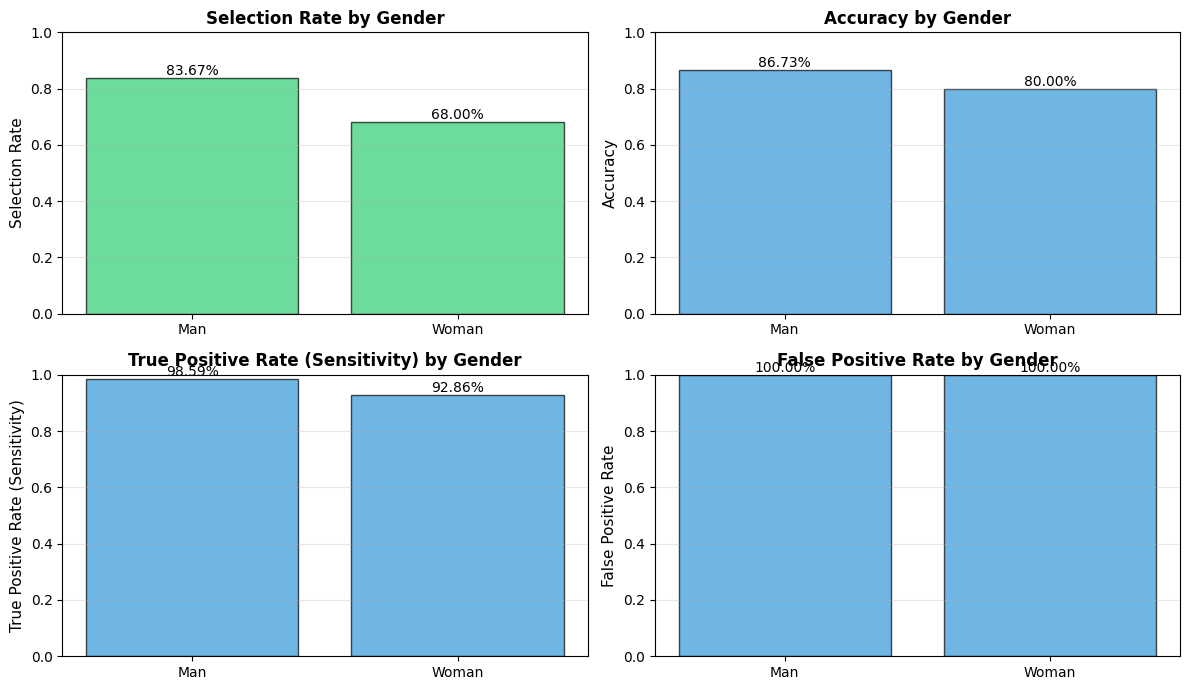

In [1015]:
# Performance visualisation by gender
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

metrics_names = ['selection_rate', 'accuracy', 'tpr', 'fpr']
titles = ['Selection Rate', 'Accuracy', 'True Positive Rate (Sensitivity)', 'False Positive Rate']

for idx, (metric, title) in enumerate(zip(metrics_names, titles)):
    ax = axes[idx // 2, idx % 2]
    groups = list(metrics_by_gender.keys())
    values = [metrics_by_gender[g][metric] for g in groups]
    
    colors = ['#2ecc71' if metric == 'selection_rate' else '#3498db' for _ in groups]
    bars = ax.bar(groups, values, color=colors, alpha=0.7, edgecolor='black')
    
    ax.set_ylabel(title, fontsize=11)
    ax.set_ylim(0, 1)
    ax.set_title(f'{title} by Gender', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add the values to the bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### 2. Analysis by demographic group (Married)


FAIRNESS ANALYSIS - By Marital Status (Married)

Fairness Metrics by Marital Status:


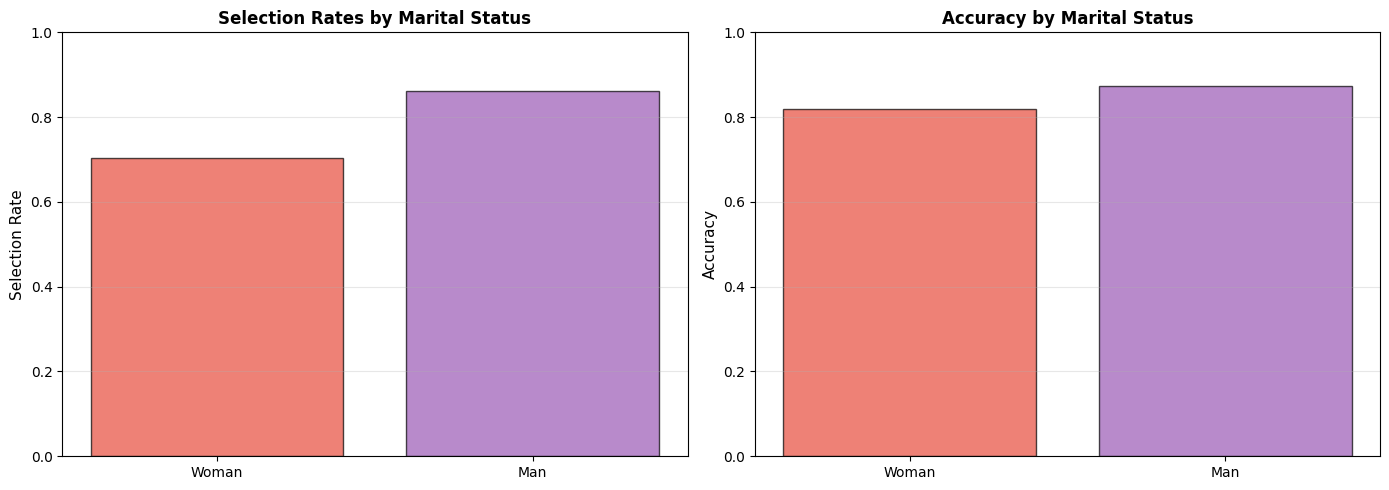

In [1016]:
print("\n" + "="*70)
print("FAIRNESS ANALYSIS - By Marital Status (Married)")
print("="*70)

X_test_with_married = X_test.copy()
X_test_with_married['Married'] = cat_data.loc[X_test.index, 'Married']
married_groups = X_test_with_married['Married']

metrics_by_married = fairness_metrics(y_test, y_pred_test, married_groups)

print("\nFairness Metrics by Marital Status:")
for group_val in sorted(married_groups.unique()):
    group_name = 'Married' if group_val == 1 else 'Unmarried'
    if group_name in metrics_by_married:
        metrics = metrics_by_married[group_name]
        print(f"\n{group_name}:")
        print(f"  Selection rate:     {metrics['selection_rate']:.2%}")
        print(f"  Accuracy:              {metrics['accuracy']:.4f}")
        print(f"  True Positive Rate:     {metrics['tpr']:.4f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

groups_married = list(metrics_by_married.keys())
selection_rates_m = [metrics_by_married[g]['selection_rate'] for g in groups_married]
accuracies_m = [metrics_by_married[g]['accuracy'] for g in groups_married]

axes[0].bar(groups_married, selection_rates_m, color=['#e74c3c', '#9b59b6'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Selection Rate', fontsize=11)
axes[0].set_title('Selection Rates by Marital Status', fontsize=12, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(groups_married, accuracies_m, color=['#e74c3c', '#9b59b6'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Accuracy by Marital Status', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


#### 3. Heatmap of biases by group

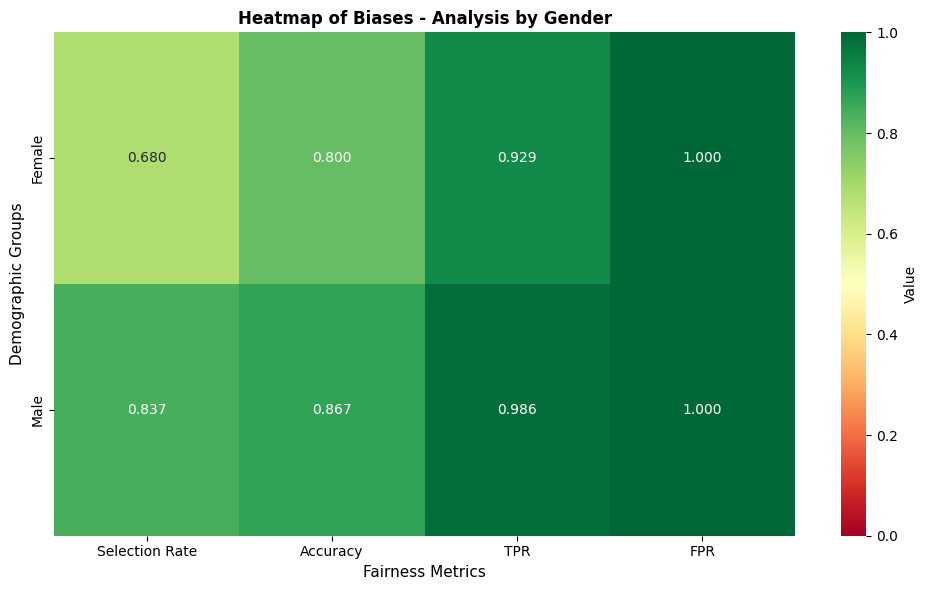

In [1017]:
# Create a bias matrix
groups_list = ['Female', 'Male', 'Married', 'Not Married']
metrics_list = ['Selection Rate', 'Accuracy', 'TPR', 'FPR']

bias_matrix = np.zeros((len(groups_list), len(metrics_list)))

# Fill in the matrix
for i, metric in enumerate(metrics_list):
    metric_key = metric.lower().replace(' ', '_')
    
    # Gender groups
    for j, (gender_val, gender_name) in enumerate([(0, 'Female'), (1, 'Male')]):
        mask = X_test_with_gender['Gender'] == gender_val
        if mask.sum() > 0:
            y_true_g = y_test[mask]
            y_pred_g = y_pred_test[mask]
            
            if metric == 'Selection Rate':
                bias_matrix[j, i] = y_pred_g.mean()
            elif metric == 'Accuracy':
                bias_matrix[j, i] = (y_true_g == y_pred_g).mean()
            elif metric == 'TPR':
                bias_matrix[j, i] = recall_score(y_true_g, y_pred_g, zero_division=0)
            elif metric == 'FPR':
                bias_matrix[j, i] = 1 - recall_score(y_true_g[y_true_g == 0], y_pred_g[y_true_g == 0], zero_division=0) if (y_true_g == 0).sum() > 0 else 0

# Visualize the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bias_matrix[:2, :], annot=True, fmt='.3f', cmap='RdYlGn', 
            xticklabels=metrics_list, yticklabels=['Female', 'Male'],
            cbar_kws={'label': 'Value'}, vmin=0, vmax=1)
plt.title('Heatmap of Biases - Analysis by Gender', fontsize=12, fontweight='bold')
plt.ylabel('Demographic Groups', fontsize=11)
plt.xlabel('Fairness Metrics', fontsize=11)
plt.tight_layout()
plt.show()


#### 4. Analysis of residuals (errors) by group

In [1018]:
print("\n" + "="*70)
print("ANALYSIS OF PREDICTION ERRORS BY GROUP")
print("="*70)

# Calculate errors
errors = (y_test.values != y_pred_test).astype(int)
false_positives = ((y_test.values == 0) & (y_pred_test == 1)).astype(int)
false_negatives = ((y_test.values == 1) & (y_pred_test == 0)).astype(int)

print("\nBy Gender:")
for gender_val, gender_name in [(0, 'Female'), (1, 'Male')]:
    mask = X_test_with_gender['Gender'] == gender_val
    if mask.sum() > 0:
        error_rate = errors[mask].mean()
        fp_rate = false_positives[mask].sum() / mask.sum()
        fn_rate = false_negatives[mask].sum() / mask.sum()
        
        print(f"\n{gender_name}:")
        print(f"  Overall error rate:  {error_rate:.2%}")
        print(f"  False positive rate:    {fp_rate:.2%}")
        print(f"  False negative rate:    {fn_rate:.2%}")



ANALYSIS OF PREDICTION ERRORS BY GROUP

By Gender:

Female:
  Overall error rate:  20.00%
  False positive rate:    16.00%
  False negative rate:    4.00%

Male:
  Overall error rate:  13.27%
  False positive rate:    12.24%
  False negative rate:    1.02%


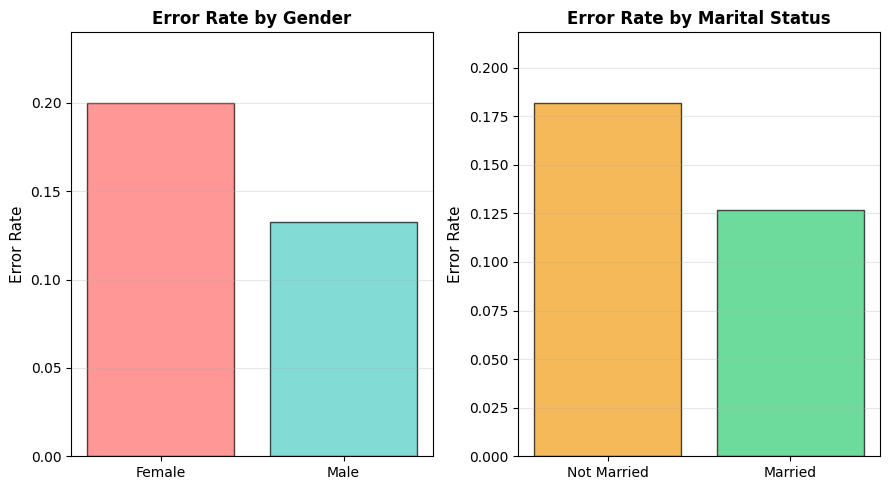

In [1019]:
# Viewing errors by group
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# By Gender
error_by_gender = []
for gender_val, gender_name in [(0, 'Female'), (1, 'Male')]:
    mask = X_test_with_gender['Gender'] == gender_val
    if mask.sum() > 0:
        error_by_gender.append(errors[mask].mean())

axes[0].bar(['Female', 'Male'], error_by_gender, color=['#ff6b6b', '#4ecdc4'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Error Rate', fontsize=11)
axes[0].set_title('Error Rate by Gender', fontsize=12, fontweight='bold')
axes[0].set_ylim(0, max(error_by_gender) * 1.2)
axes[0].grid(axis='y', alpha=0.3)

# By Marital Status
error_by_married = []
for married_val in sorted(married_groups.unique()):
    mask = X_test_with_married['Married'] == married_val
    if mask.sum() > 0:
        error_by_married.append(errors[mask].mean())

married_labels = ['Not Married', 'Married']
axes[1].bar(married_labels, error_by_married, color=['#f39c12', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Error Rate', fontsize=11)
axes[1].set_title('Error Rate by Marital Status', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, max(error_by_married) * 1.2)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


#### 5. Summary of findings on Fairness


SUMMARY - FAIRNESS ANALYSIS OF THE MODEL
              Feature  Importance
10     Credit_History    2.576690
1             Married    0.433714
0              Gender    0.407803
3           Education    0.386629
4       Self_Employed    0.239769
2          Dependents    0.145129
5       Property_Area    0.064984
9    Loan_Amount_Term    0.001818
8          LoanAmount    0.000720
7   CoapplicantIncome    0.000064
6     ApplicantIncome    0.000007


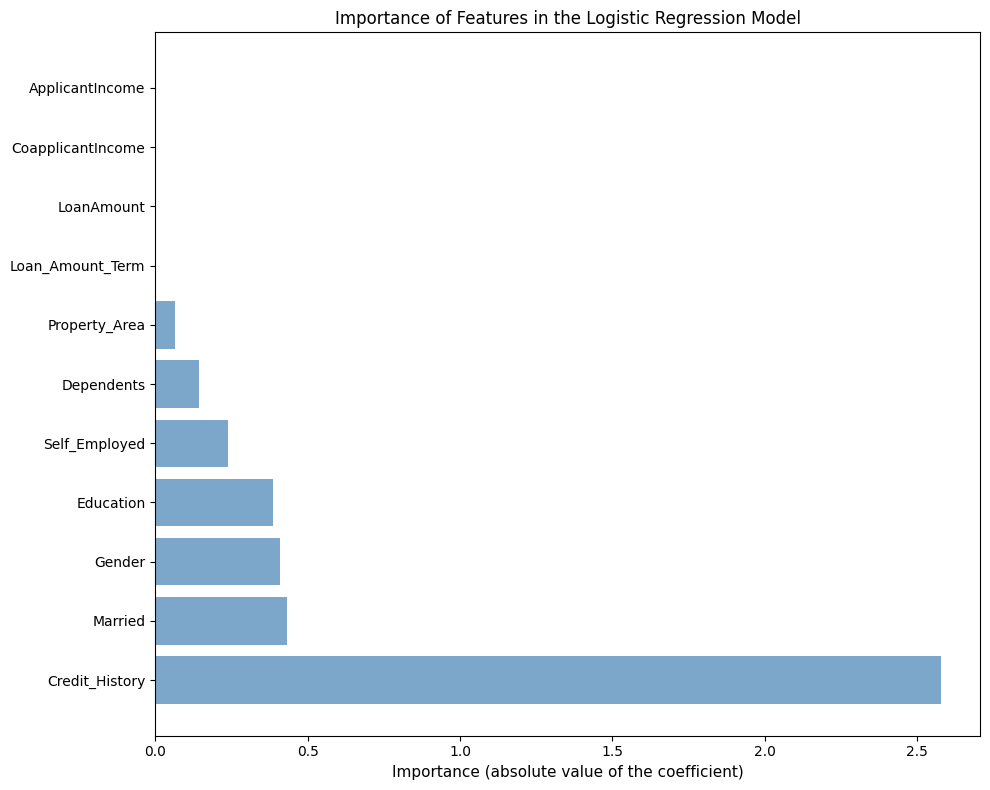

In [1020]:
print("\n" + "="*70)
print("SUMMARY - FAIRNESS ANALYSIS OF THE MODEL")
print("="*70)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_[0])
}).sort_values('Importance', ascending=False)

print(importance_df.to_string())

# Visualisation of feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue', alpha=0.7)
plt.xlabel("Importance (absolute value of the coefficient)", fontsize=11)
plt.title("Importance of Features in the Logistic Regression Model", fontsize=12)
plt.tight_layout()
plt.show()


### DEPLOYMENT PLAN ON STREAMLIT CLOUD

#### Simplified Deployment Process

#### **Step 1: Prepare the GitHub Repository**
1. Create a repository on GitHub: https://github.com/new
2. Clone locally: `git clone <url>`
3. Add your files (streamlit_app.py, requirements.txt, models/, data/)
4. Commit and push:
   ```bash
   git add .
   git commit -m "Initial commit"
   git push origin main
   ```

#### **Step 2: Create requirements.txt**
At the root of the project, create `requirements.txt` with:

scikit-learn>=1.3.0 pandas>=2.0.0 numpy>=1.24.0 streamlit>=1.28.0 matplotlib>=3.7.0 seaborn>=0.12.0 shap>=0.43.0 lime>=0.2.0 joblib>=1.3.0 plotly>=5.14.0

#### **Step 3: Create the Streamlit app**
Create `streamlit_app.py` in the root directory with your Streamlit interface.

#### **Step 4: Deploy to Streamlit Cloud**
1. Go to https://streamlit.io/cloud
2. Log in with GitHub
3. Click ‘New app’
4. Select:
   - Repository: `YOUR_USERNAME/loan-prediction-app`
   - Branch: `main`
   - File: `streamlit_app.py`
5. Click ‘Deploy’

#### **Step 5: Access the app**
My application is available at:

[https://loan-prediction-alingom.streamlit.app](https://loan-prediction-alingom.streamlit.app/)
